# Importing Data and merge

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customer_demographics = pd.read_excel('dataset/CustomerDemographics.xlsx', engine='openpyxl')
customer_behavior = pd.read_excel('dataset/CustomerBehaviorData.xlsx', engine='openpyxl')
credit_consumption = pd.read_excel('dataset/CreditConsumptionData.xlsx', engine='openpyxl')



In [328]:
cc_df = pd.merge(customer_demographics,credit_consumption, on = 'ID', how ='inner' )
all_data= pd.merge(cc_df,customer_behavior, on = 'ID', how ='inner' )
all_data.head(5)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39


In [329]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons                       15000 non-null  float64
 11  cc_cons_apr                   20000 non-null  float64
 12  dc_cons_apr                   20000 non-null  float64
 13  c

Split Data into two missing cc_cons values data and non-missing cc_cons values data

In [330]:
missing_mask = all_data['cc_cons'].isnull()
#missing values in the 'cc_cons' colmn
data_missing = all_data[missing_mask]

#new DataFrame containing only the rows with non-missing values in the 'cc_cons' column
data_non_missing = all_data[~missing_mask]



In [331]:
data_non_missing.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active'],
      dtype='object')

In [332]:
data_non_missing.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_apr,dc_cons_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04
mean,10032.077067,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,55157.729867,17957.391719,8171.098287,...,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,97670.972252,25187.939958,14773.029481,...,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05
min,1.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,0.000000,253.000000,19.350000,...,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,5060.500000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,6768.000000,4411.027500,1634.000000,...,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03
50%,10054.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,13364.000000,10288.100000,3996.900000,...,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03
75%,15015.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,20105.750000,21405.000000,9339.020000,...,9.456936e+04,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03
max,19998.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,408382.000000,441031.330000,229255.000000,...,1.060175e+07,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


# Data exploration (EDA)

Univariate Analysis

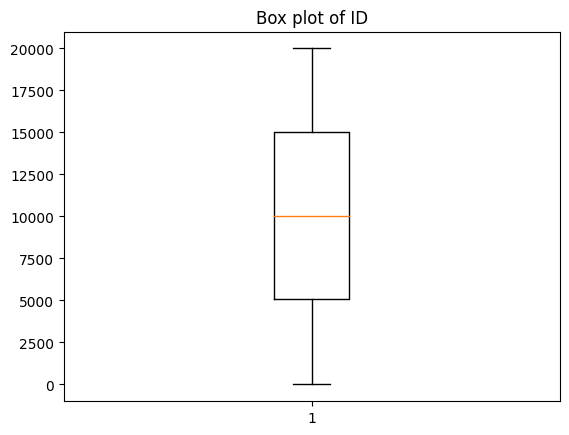

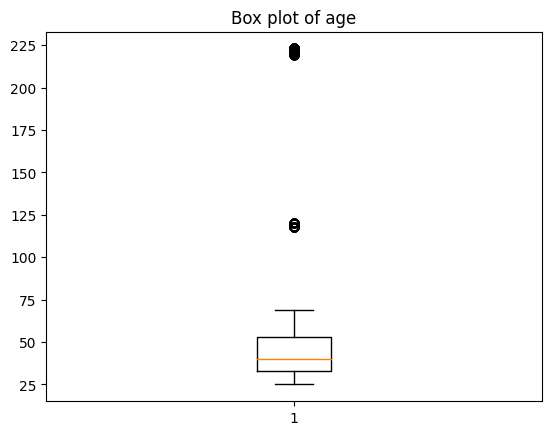

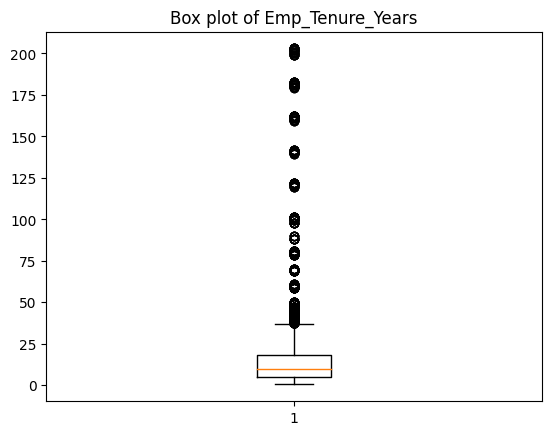

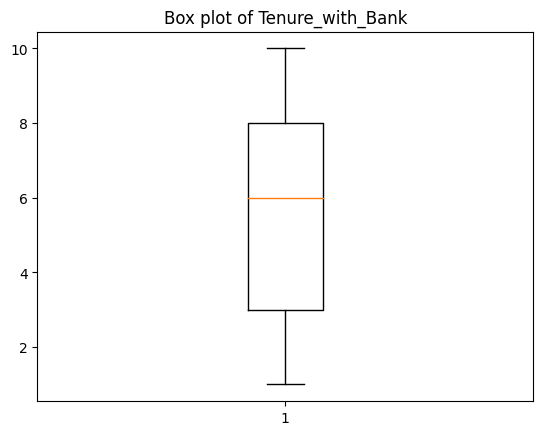

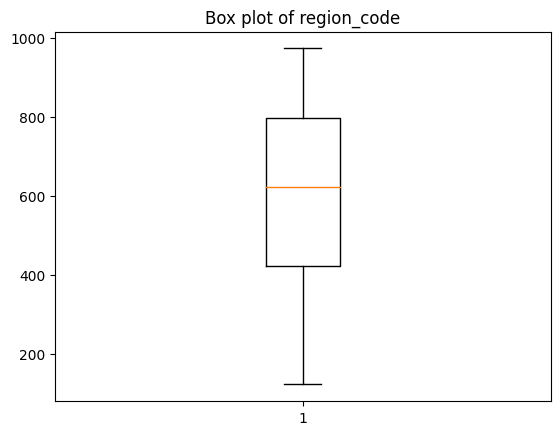

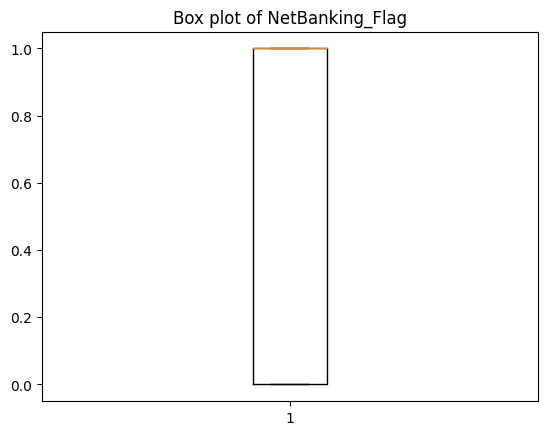

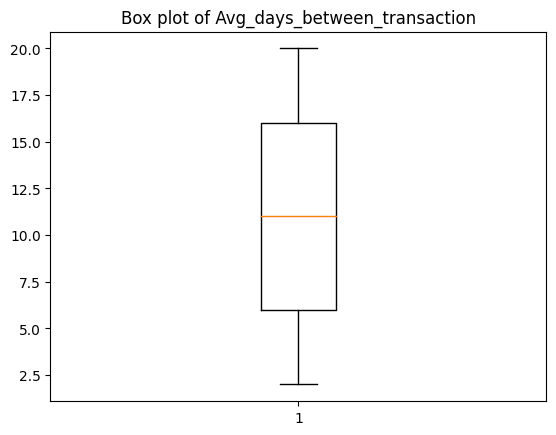

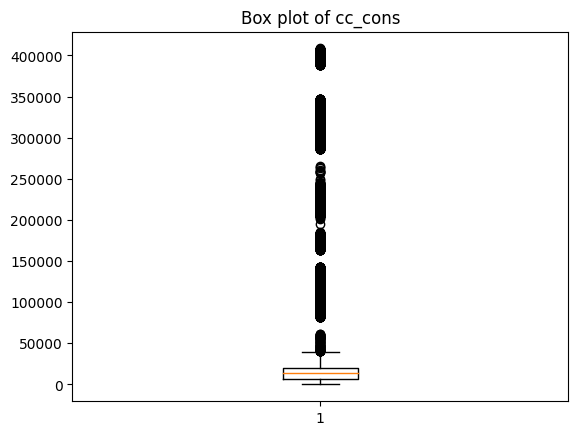

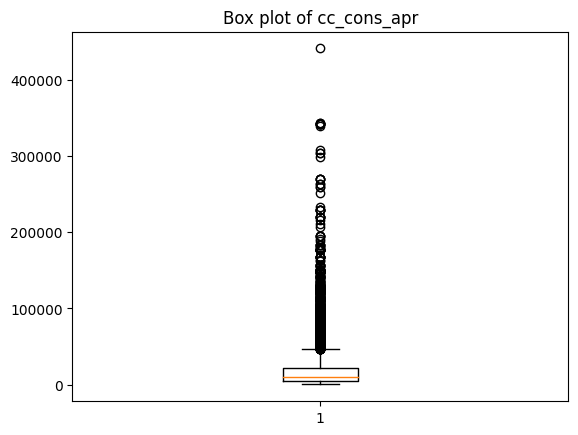

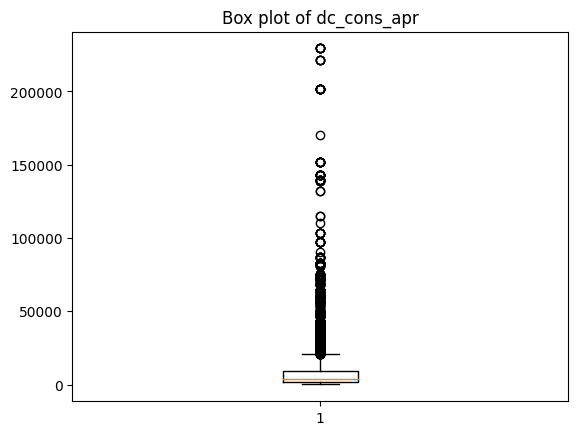

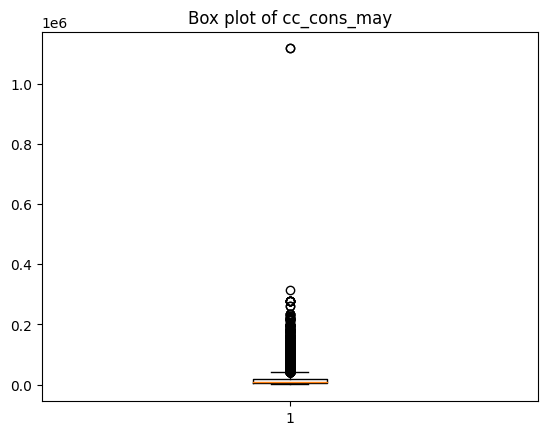

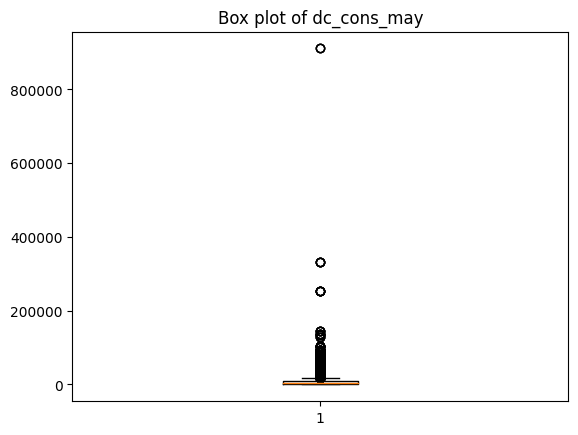

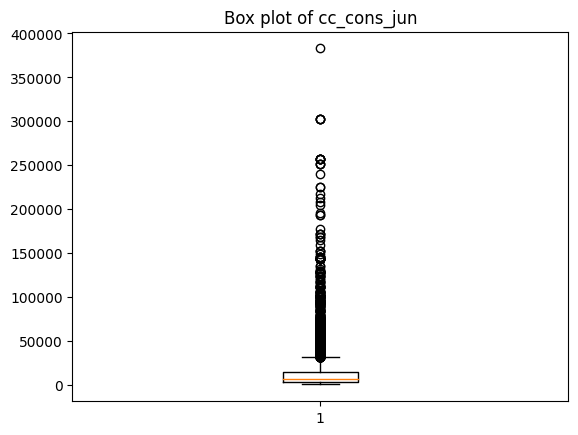

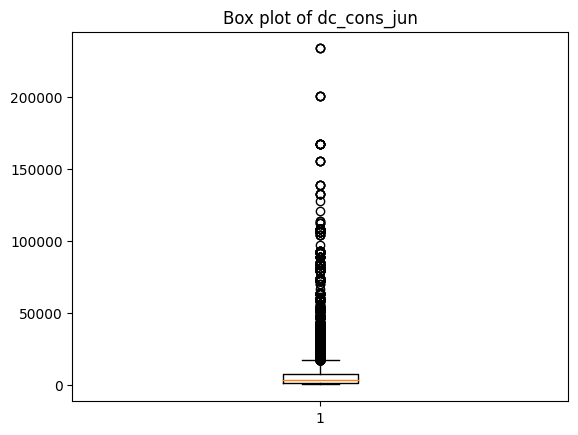

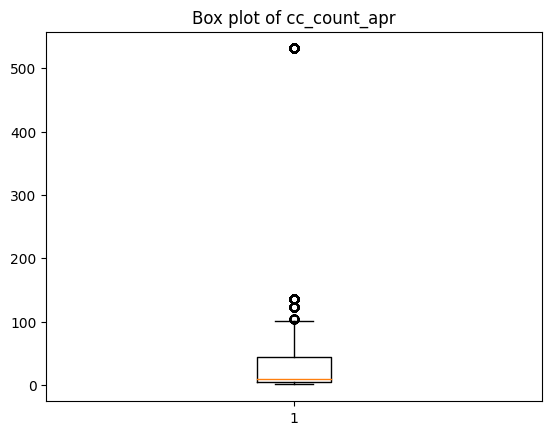

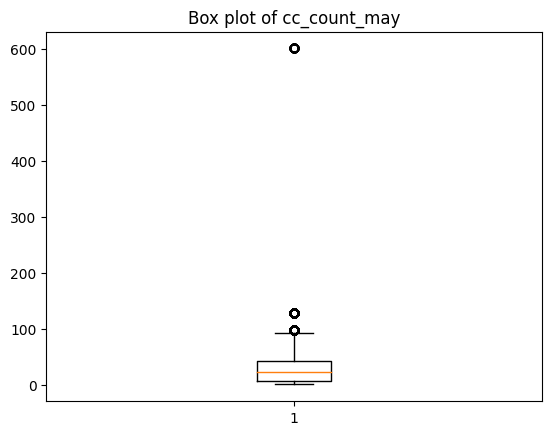

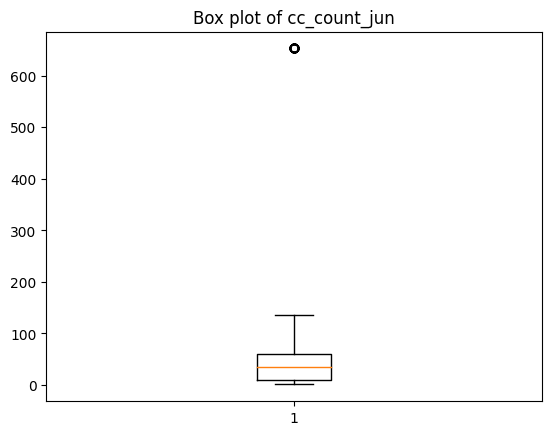

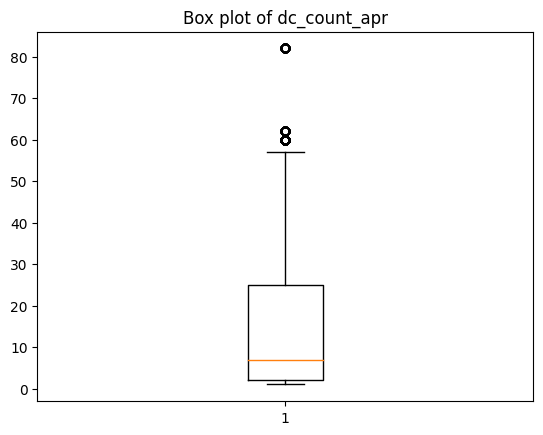

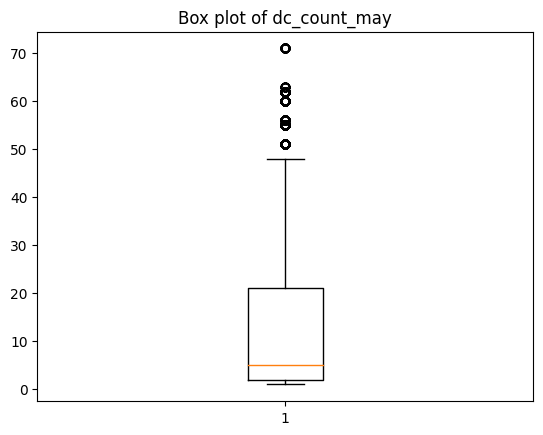

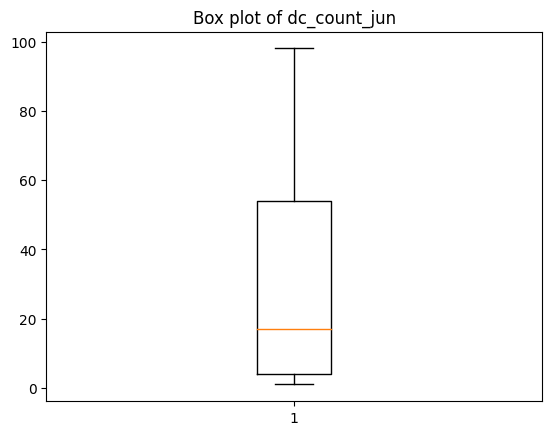

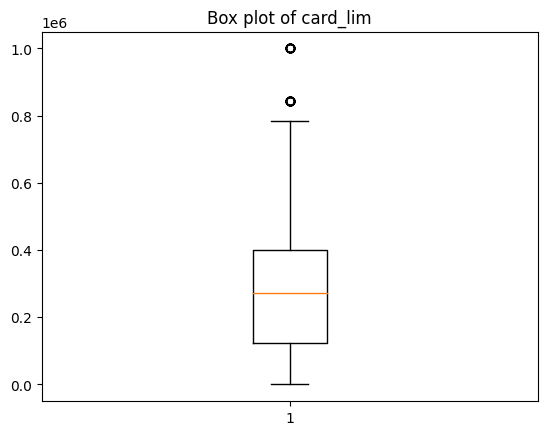

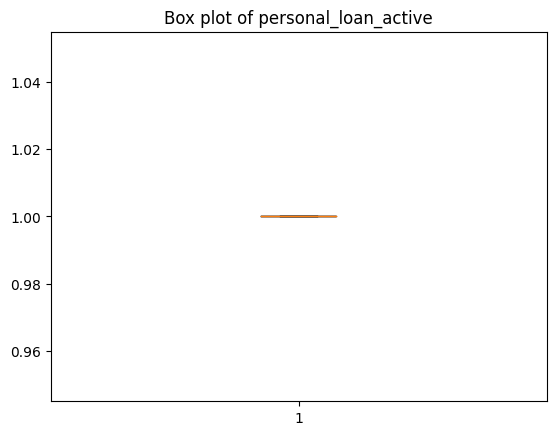

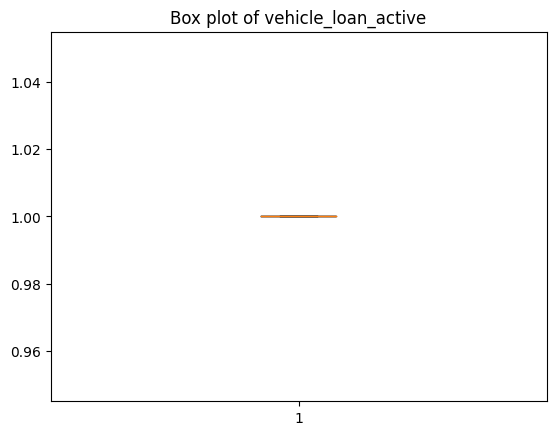

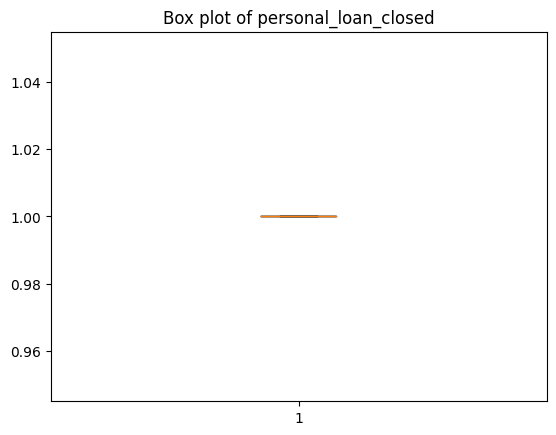

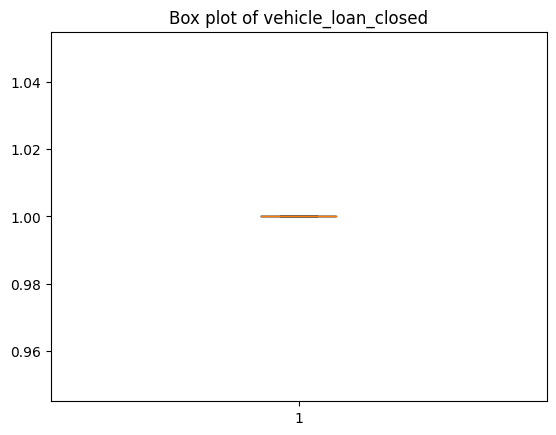

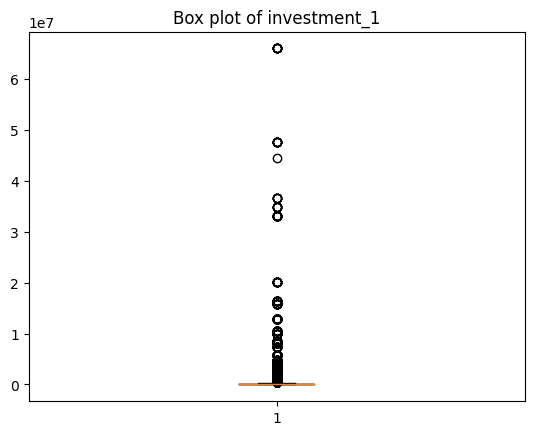

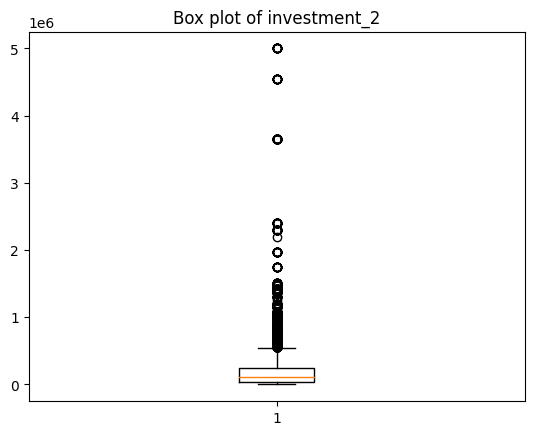

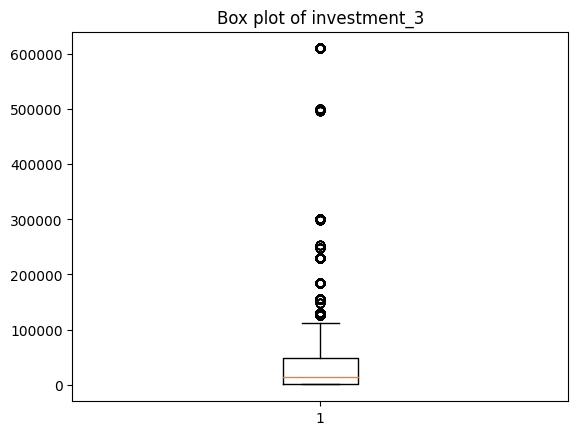

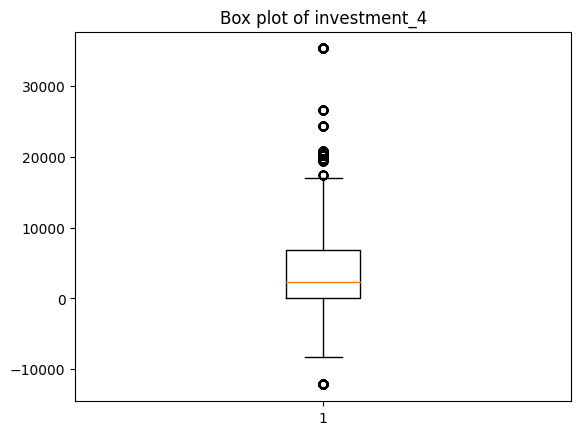

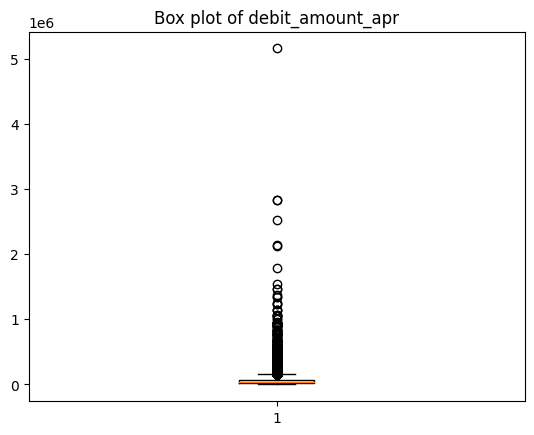

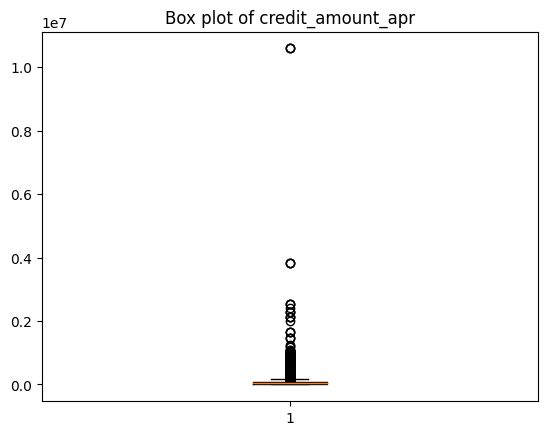

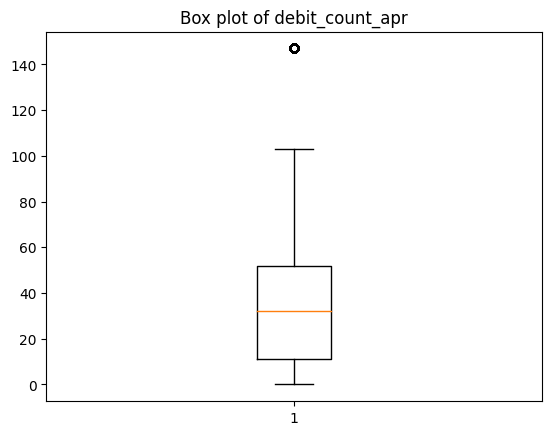

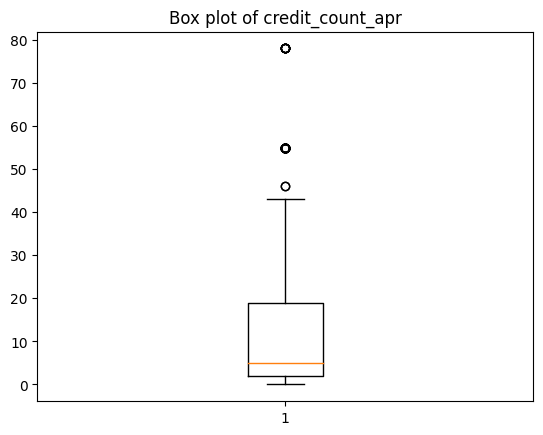

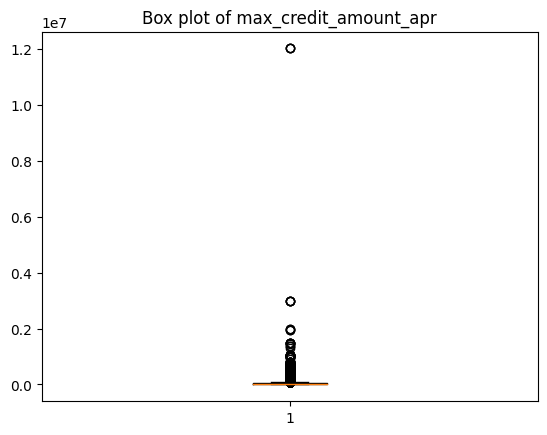

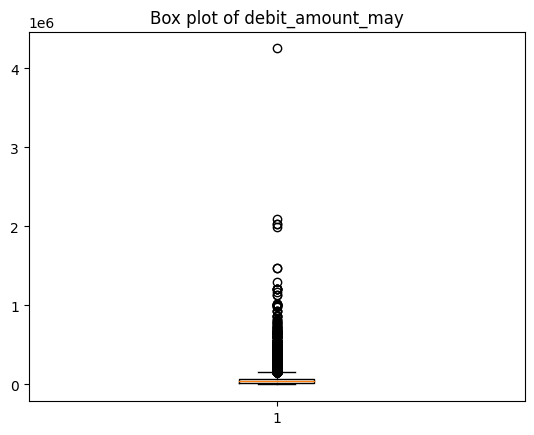

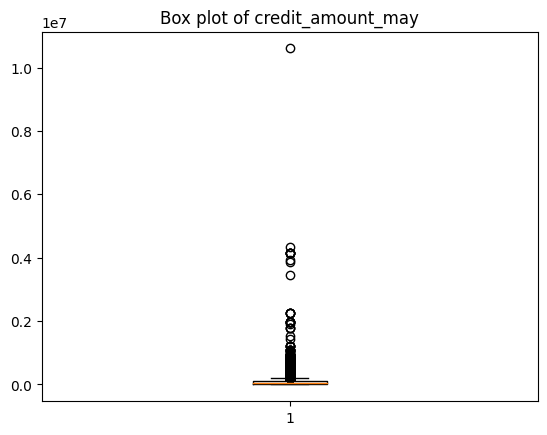

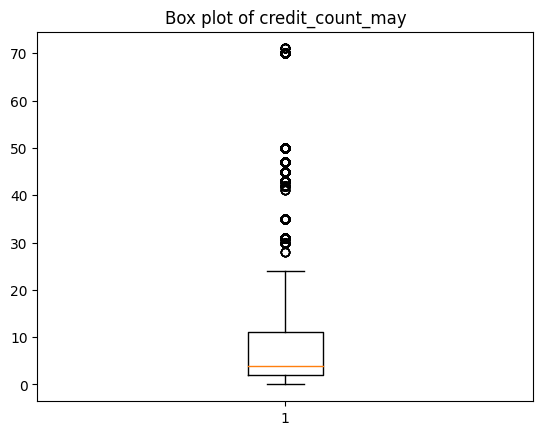

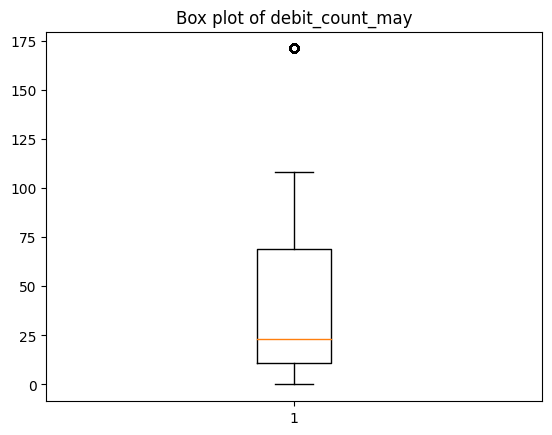

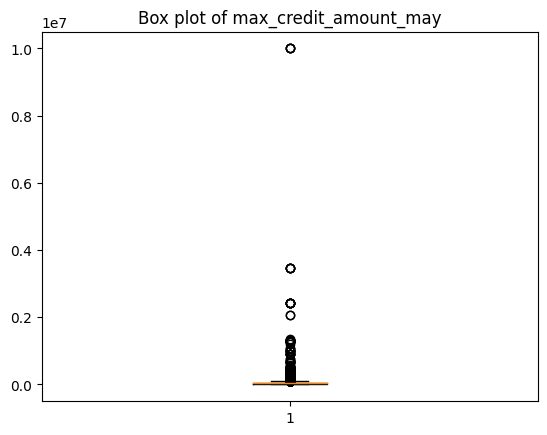

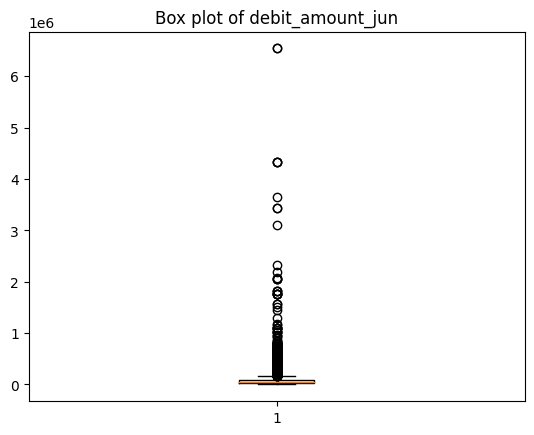

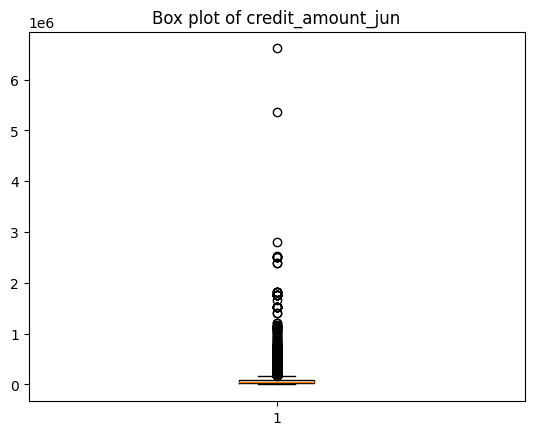

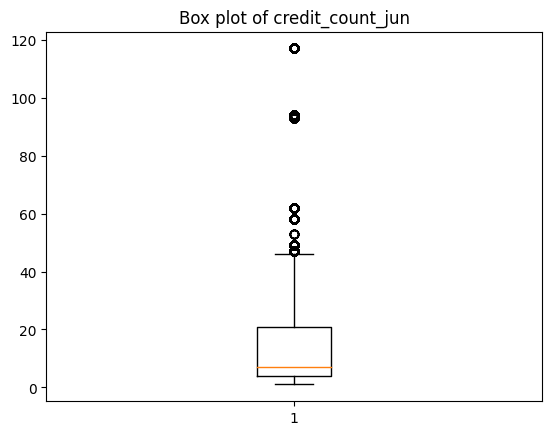

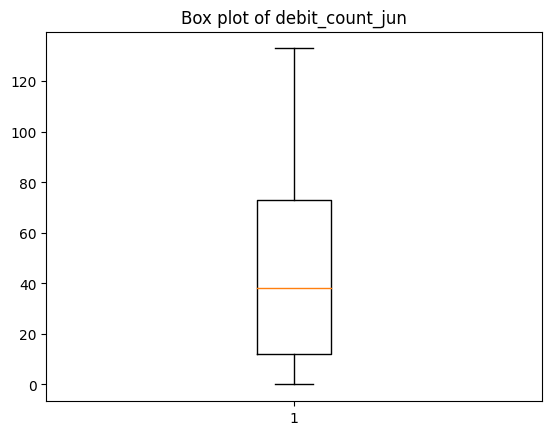

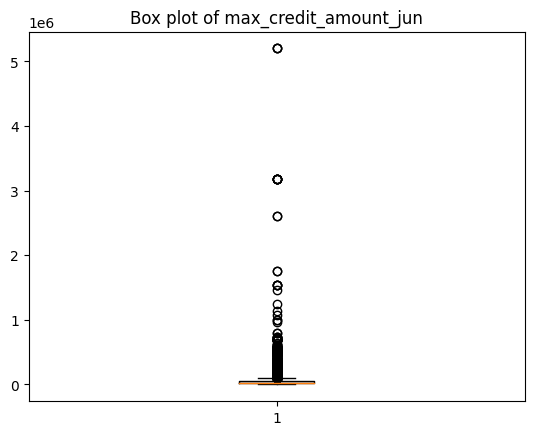

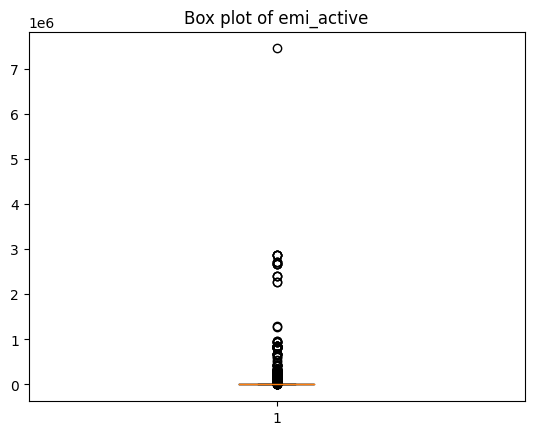

In [333]:
# Select only the numeric columns in the DataFrame
numeric_columns = data_non_missing.select_dtypes(include='number').columns

# Loop over the columns and create a box plot for each one
for col in numeric_columns:
    plt.boxplot(data_non_missing[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.show()

In [334]:
data_non_missing.nunique()

ID                              15000
account_type                        2
gender                              2
age                                43
Income                              3
Emp_Tenure_Years                  270
Tenure_with_Bank                   10
region_code                       210
NetBanking_Flag                     2
Avg_days_between_transaction       19
cc_cons                         12260
cc_cons_apr                      7408
dc_cons_apr                      3638
cc_cons_may                      7461
dc_cons_may                      3786
cc_cons_jun                      6525
dc_cons_jun                      2874
cc_count_apr                       50
cc_count_may                       58
cc_count_jun                       67
dc_count_apr                       41
dc_count_may                       39
dc_count_jun                       54
card_lim                          308
personal_loan_active                1
vehicle_loan_active                 1
personal_loa

Bivirate Analysis

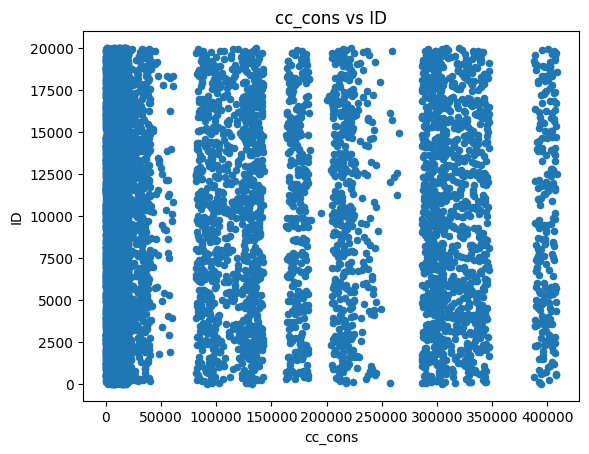

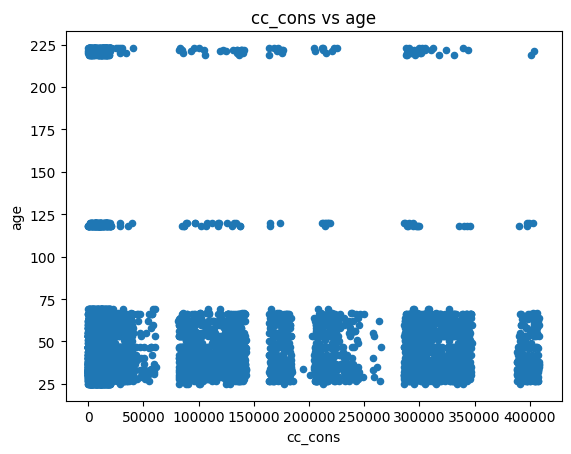

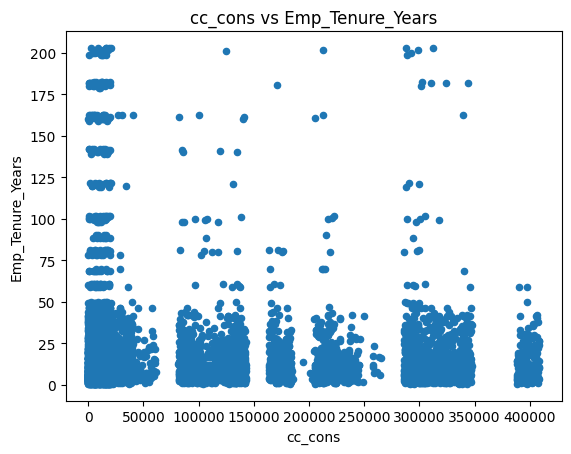

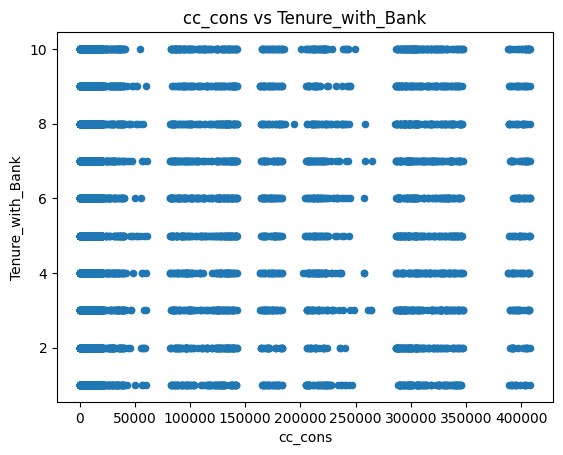

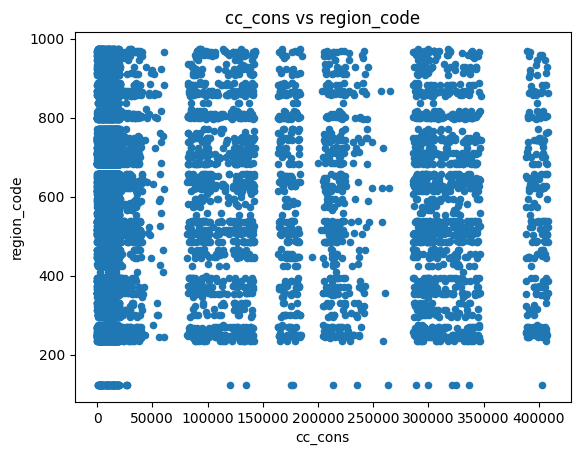

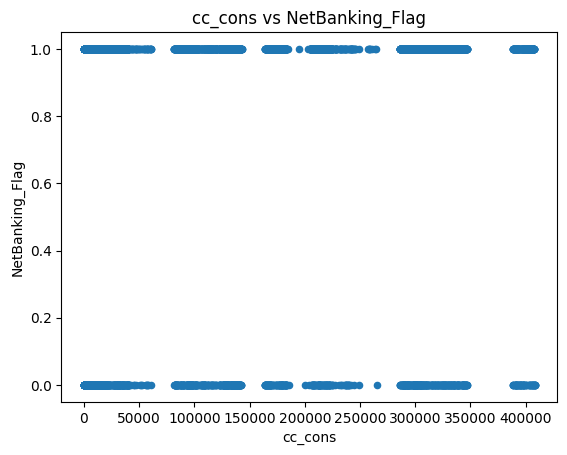

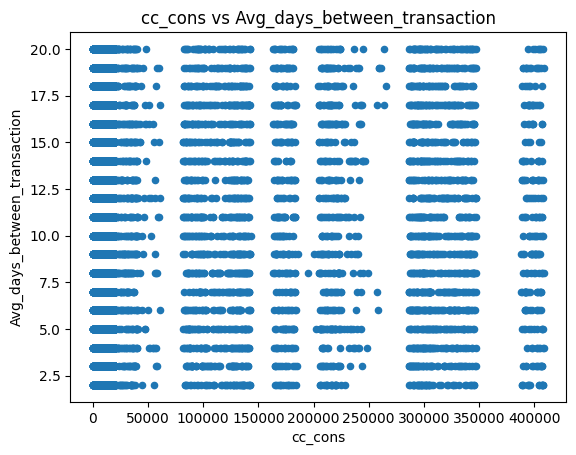

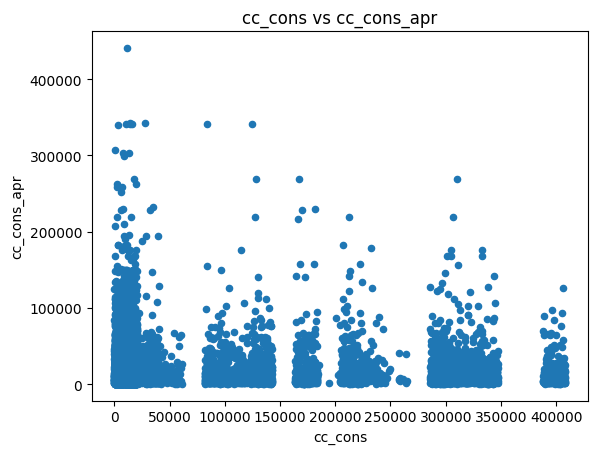

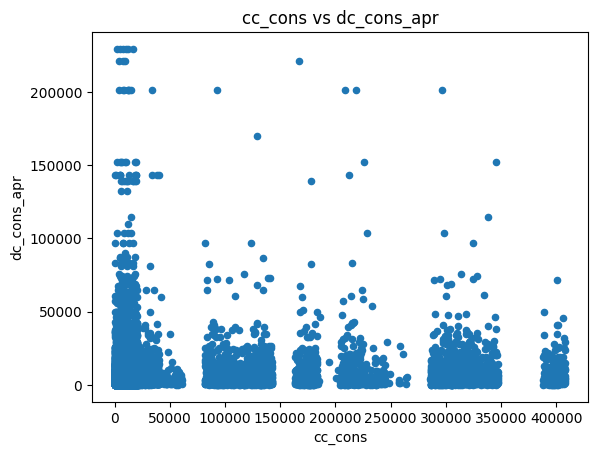

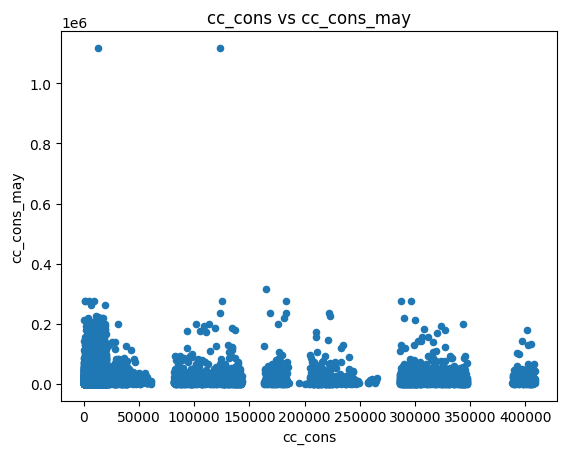

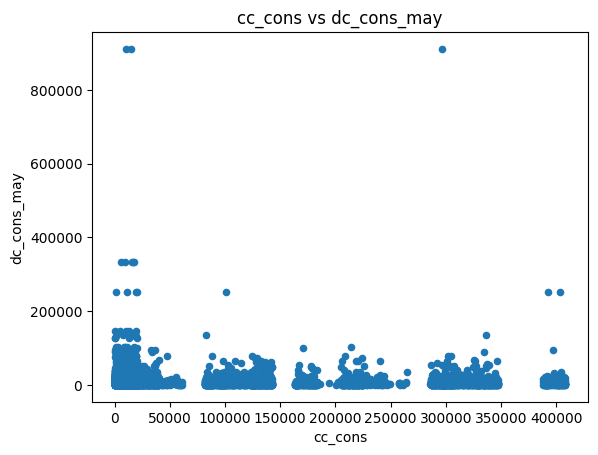

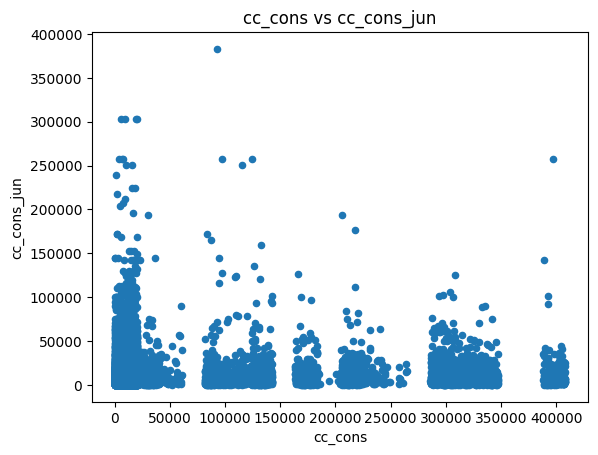

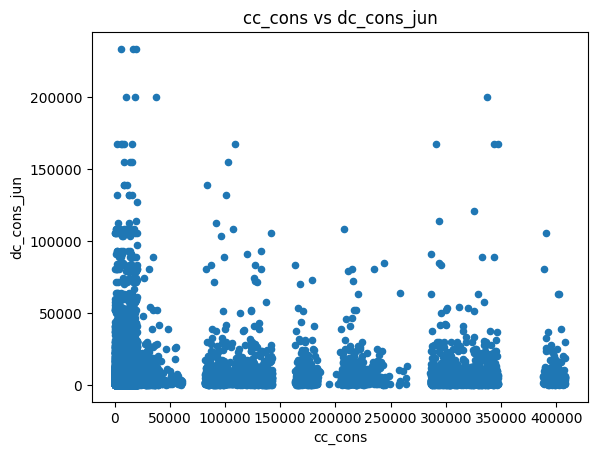

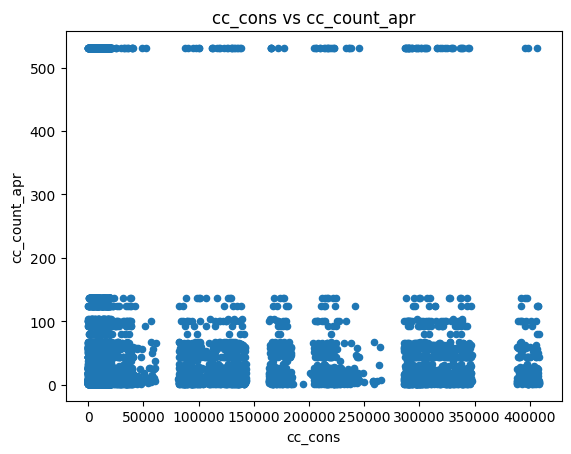

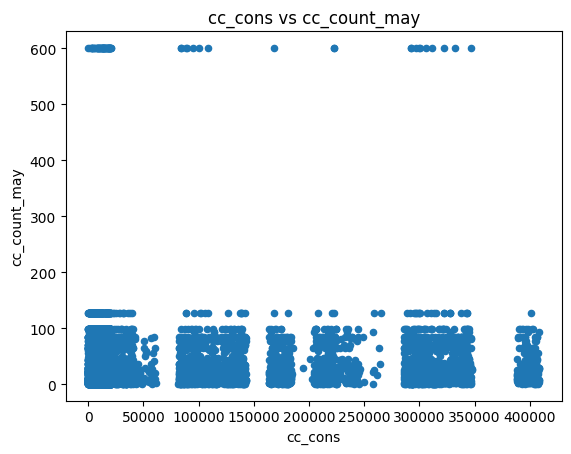

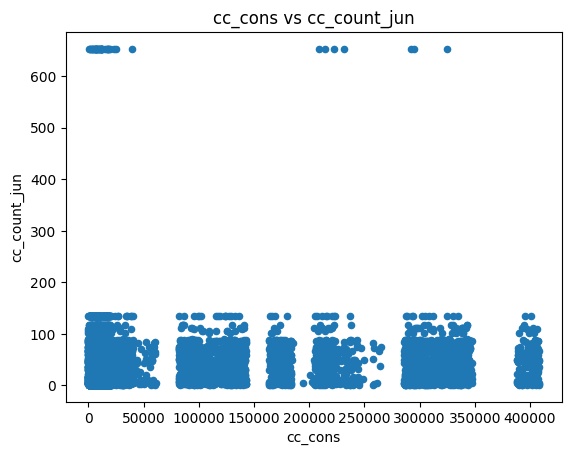

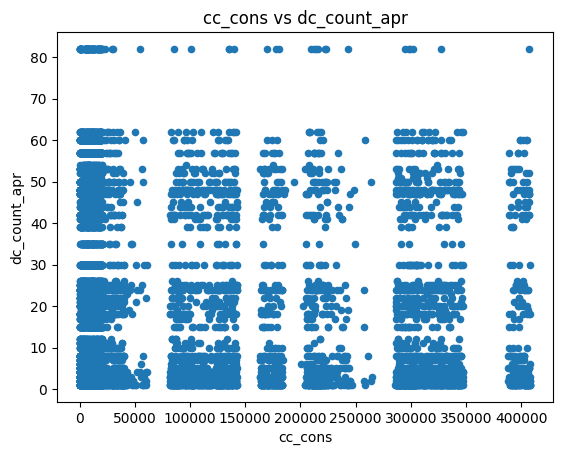

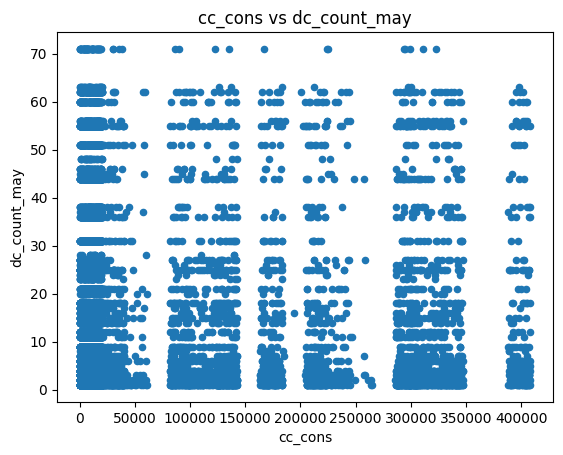

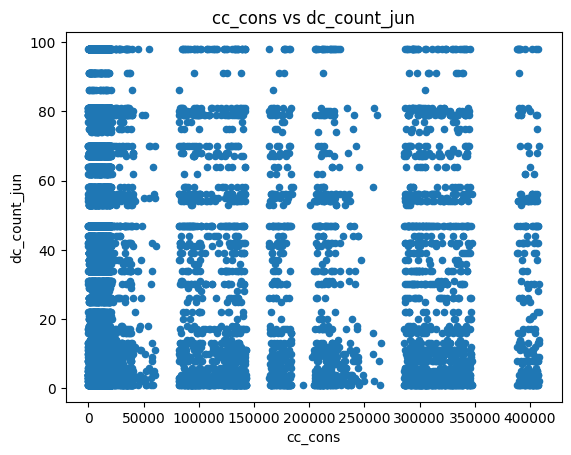

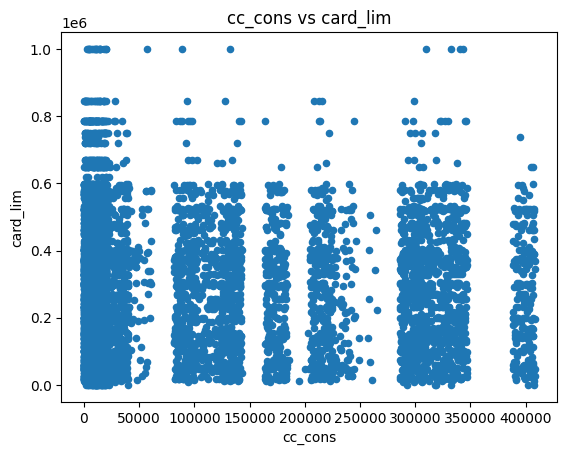

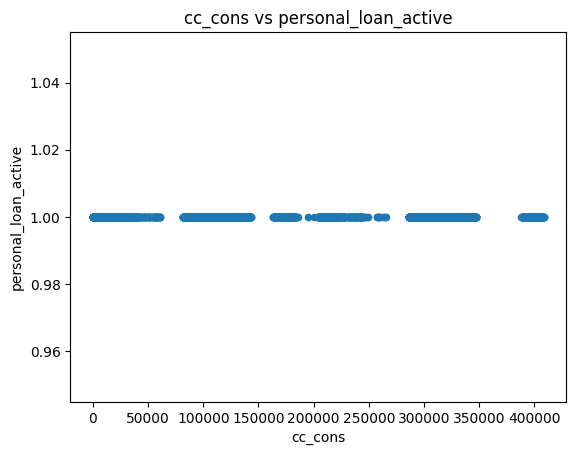

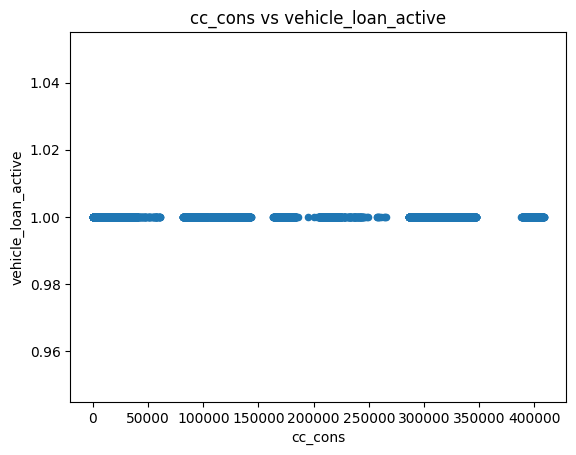

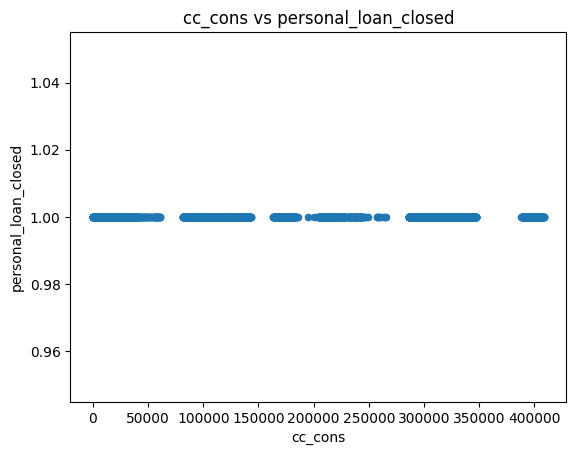

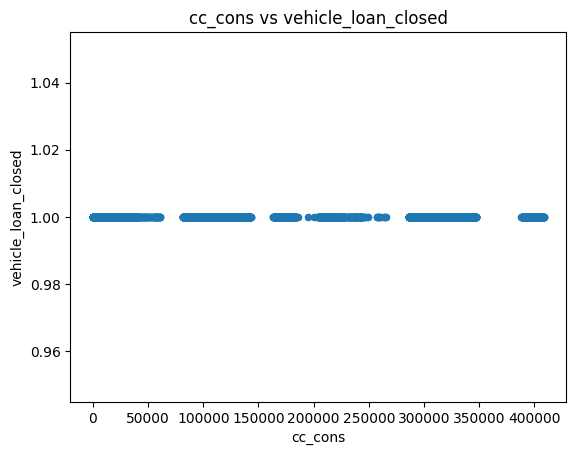

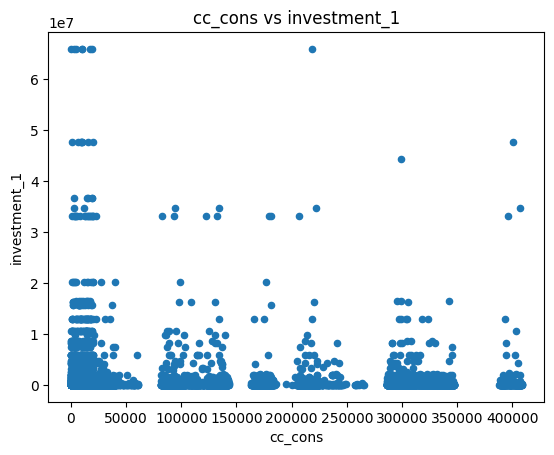

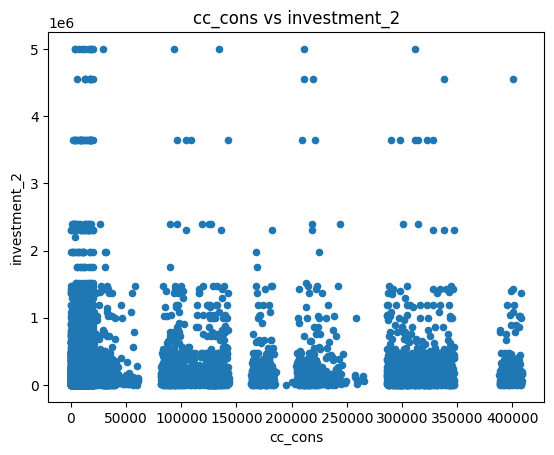

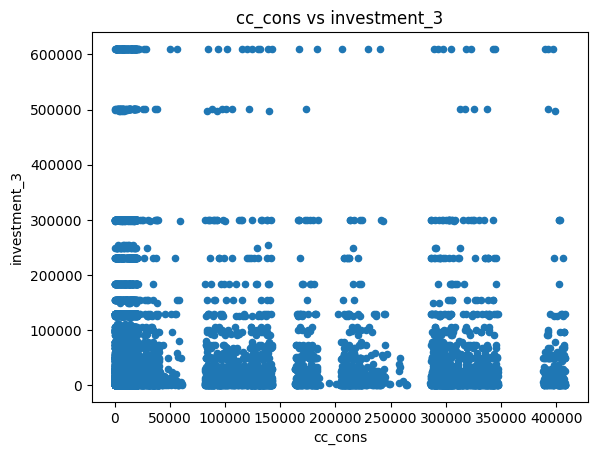

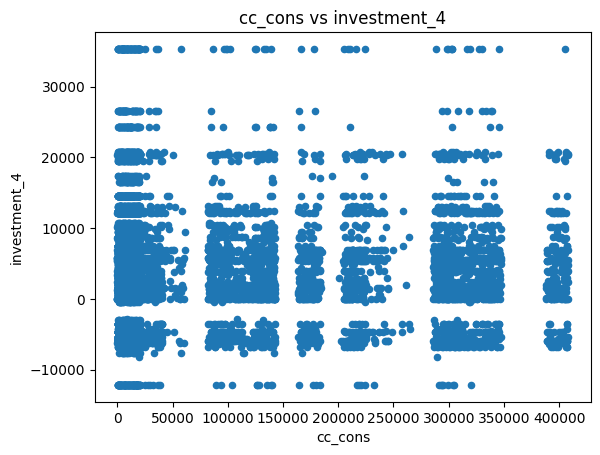

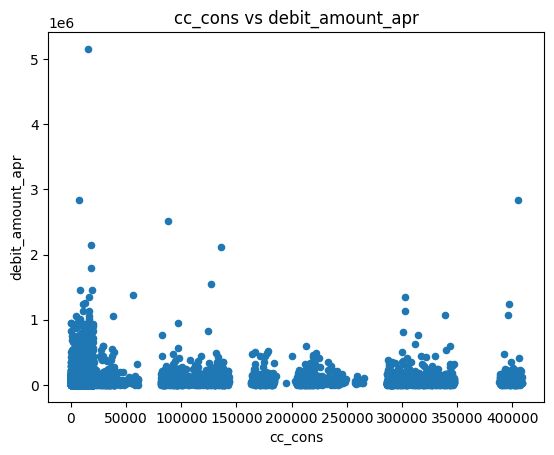

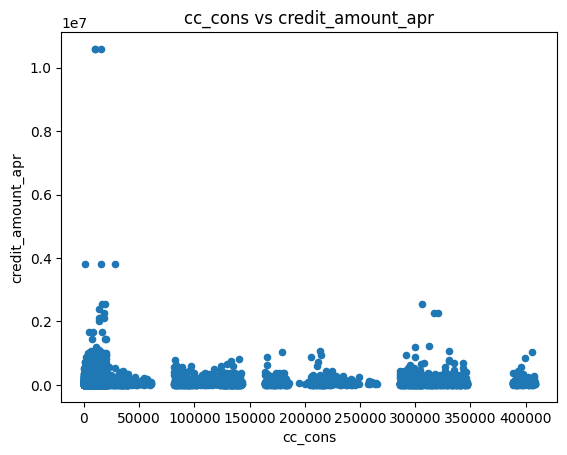

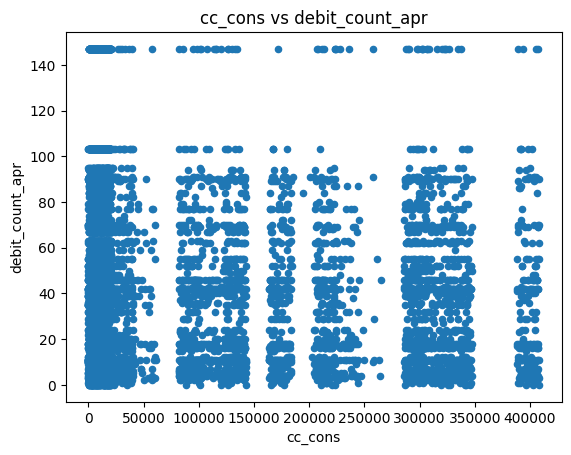

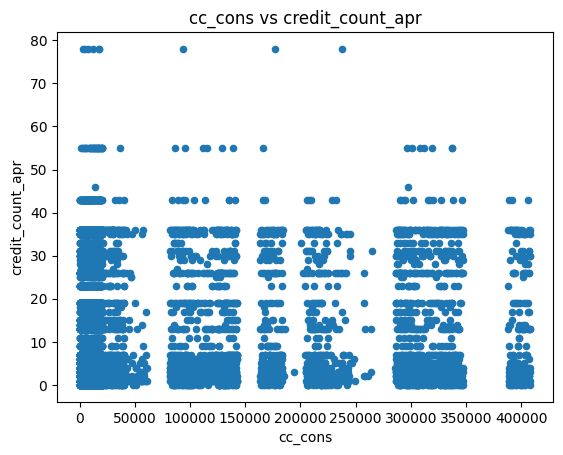

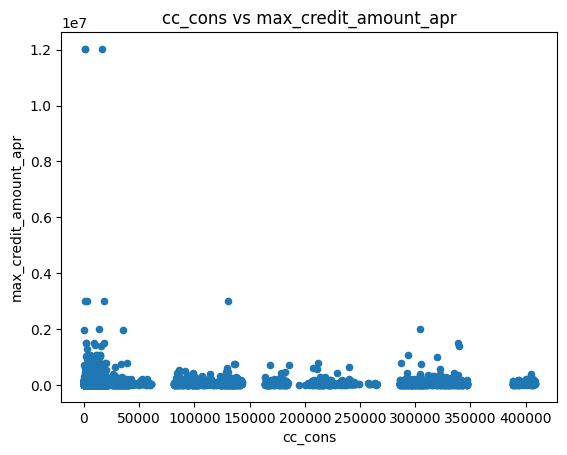

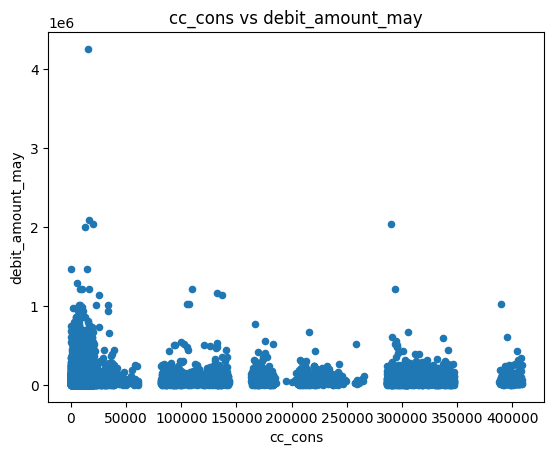

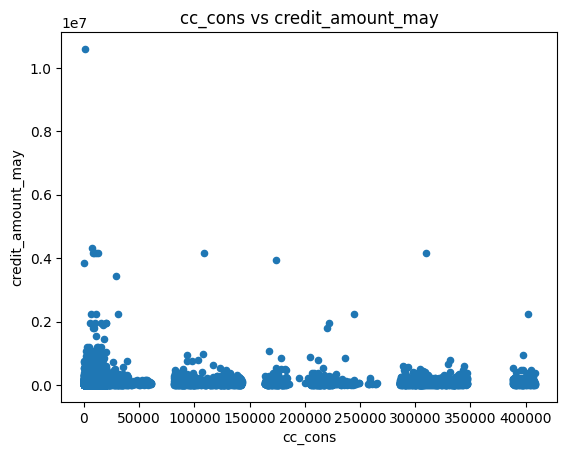

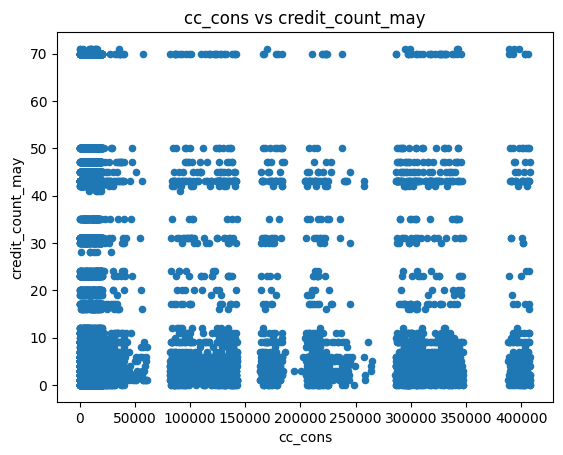

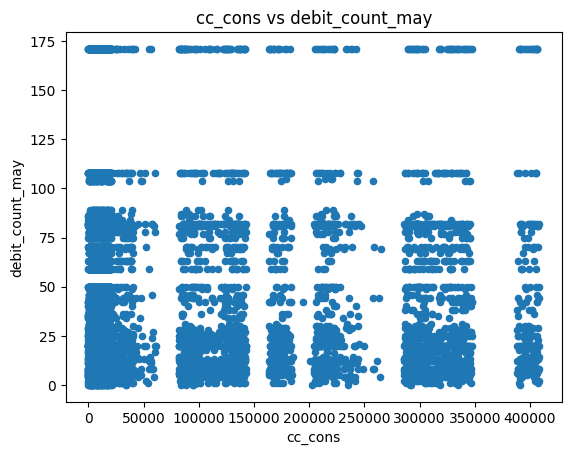

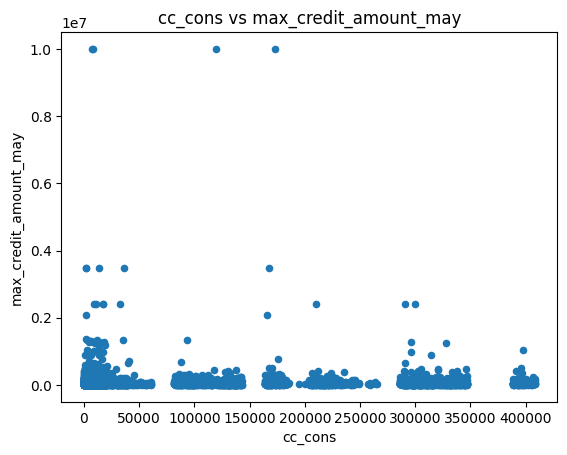

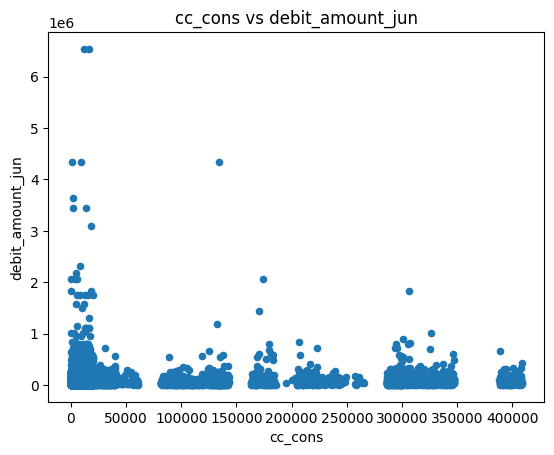

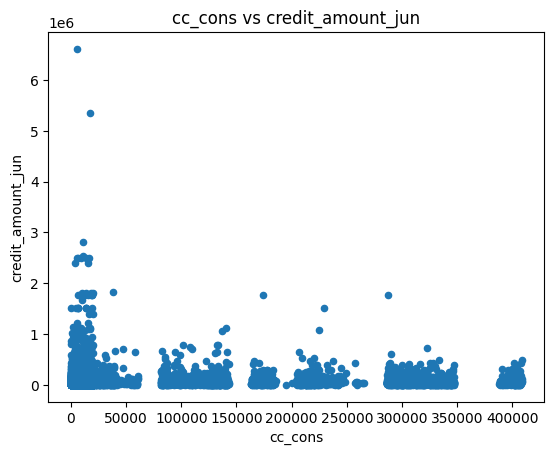

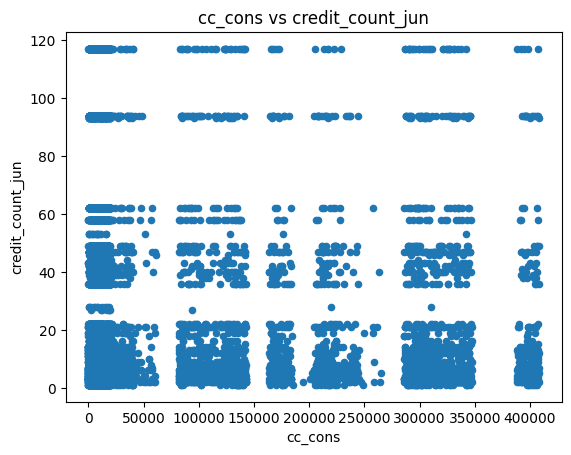

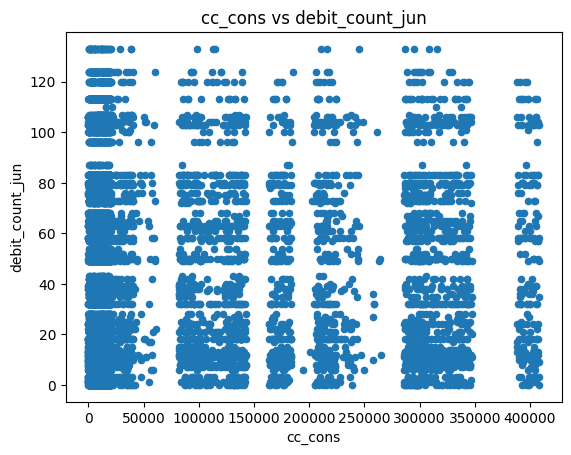

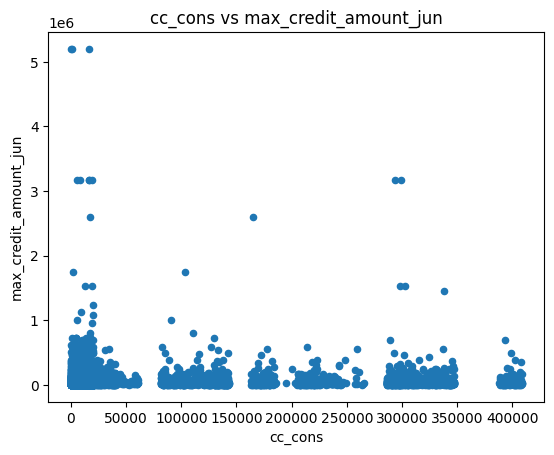

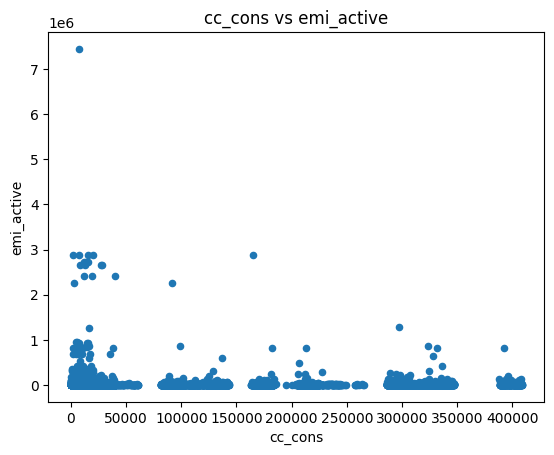

In [335]:
#Study the relationship between all the columns with the target 'cc_cons'

numeric_columns = data_non_missing.select_dtypes(include='number').columns

for col in numeric_columns:
    if col != 'cc_cons':
        data_non_missing.plot(x='cc_cons', y=col, kind='scatter')
        plt.title(f'cc_cons vs {col}')
        plt.show()


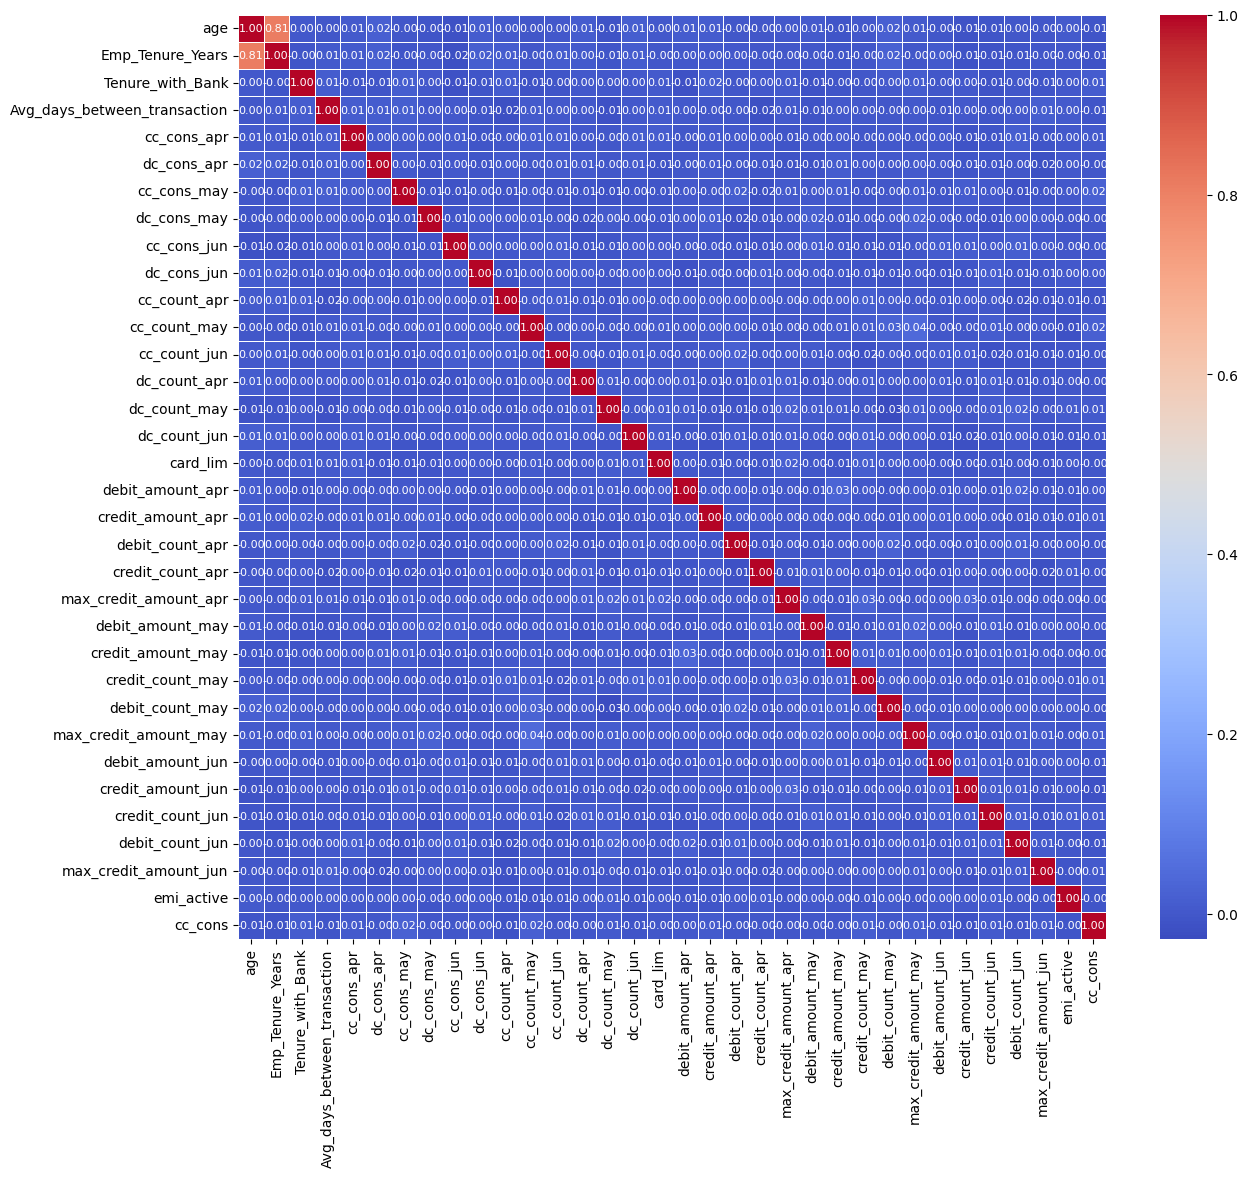

In [336]:
numeric_columns = ['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'Avg_days_between_transaction',
                     'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
                     'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
                     'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
                     'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may',
                     'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
                     'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons']

corr = data_non_missing[numeric_columns].corr()
# Set up the matplotlib figure and adjust size
plt.figure(figsize=(14, 12))

# Create a heatmap using seaborn, rotate labels, and adjust font size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.show()

In [337]:
data_non_missing.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_apr,dc_cons_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04
mean,10032.077067,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,55157.729867,17957.391719,8171.098287,...,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,97670.972252,25187.939958,14773.029481,...,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05
min,1.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,0.000000,253.000000,19.350000,...,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,5060.500000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,6768.000000,4411.027500,1634.000000,...,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03
50%,10054.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,13364.000000,10288.100000,3996.900000,...,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03
75%,15015.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,20105.750000,21405.000000,9339.020000,...,9.456936e+04,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03
max,19998.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,408382.000000,441031.330000,229255.000000,...,1.060175e+07,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


# Data Cleaning

Check if the target variable cc_cons is normally distributed or not 

The Distribution of Y variable should be normally distributed ( Assumption of linear regression)

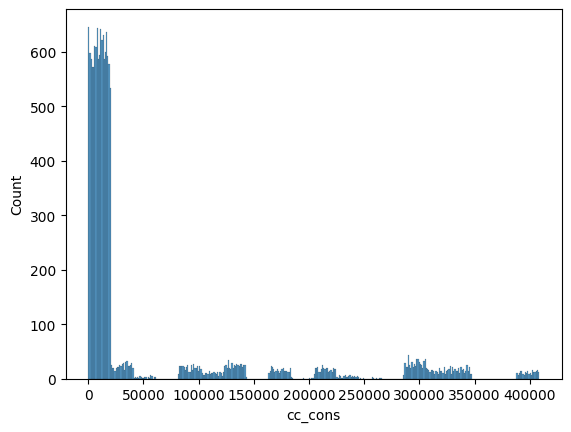

In [338]:
sns.histplot(data_non_missing.cc_cons)
plt.show()


In [339]:
from scipy.stats import shapiro

stat, p = shapiro(data_non_missing['cc_cons'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=0.572, p=0.000
Data does not look Gaussian (reject H0)


/home/daro/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The above plot does not normally distribute, so to make it normally distributed:
take log of cc_cons(targe_variable)    ( Assumption of Linear Regression)

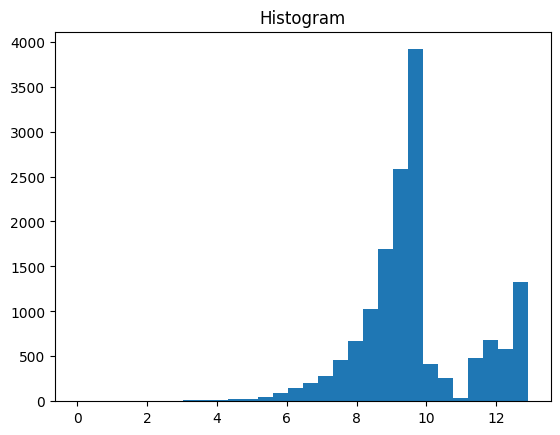

In [340]:
import numpy as np
data_non_missing = data_non_missing.copy()
data_non_missing['ln_cc_cons'] = np.log(data_non_missing['cc_cons'] + 1)

plt.hist(data_non_missing['ln_cc_cons'], bins=30)
plt.title('Histogram')
plt.show()

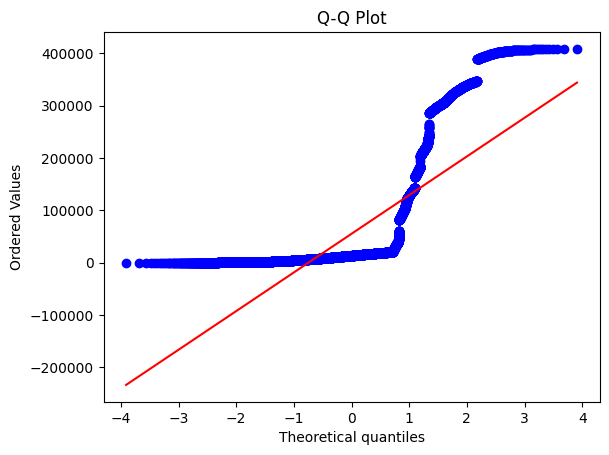

In [341]:
import scipy.stats as stats

# create a Q-Q plot
stats.probplot(data_non_missing['cc_cons'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [342]:
#Check if the the dependent variable is normally distributed
from scipy.stats import shapiro

stat, p = shapiro(data_non_missing['ln_cc_cons'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=0.936, p=0.000
Data does not look Gaussian (reject H0)


/home/daro/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [343]:
data_non_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 111 to 15110
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   account_type                  15000 non-null  object 
 2   gender                        15000 non-null  object 
 3   age                           15000 non-null  int64  
 4   Income                        15000 non-null  object 
 5   Emp_Tenure_Years              15000 non-null  float64
 6   Tenure_with_Bank              15000 non-null  int64  
 7   region_code                   15000 non-null  float64
 8   NetBanking_Flag               15000 non-null  int64  
 9   Avg_days_between_transaction  14999 non-null  float64
 10  cc_cons                       15000 non-null  float64
 11  cc_cons_apr                   15000 non-null  float64
 12  dc_cons_apr                   15000 non-null  float64
 13  cc_c

In [344]:
for x in ['account_type','gender', 'Income','loan_enq']:
    data_non_missing[x]=data_non_missing[x].astype('object')

In [345]:
data_non_missing[x]

111        Y
112        Y
113        Y
114        Y
115      NaN
        ... 
15106      Y
15107      Y
15108      Y
15109      Y
15110      Y
Name: loan_enq, Length: 15000, dtype: object

In [346]:
# Create a new DataFrame containing only the numeric columns
numeric_data = data_non_missing.select_dtypes(include='number')

# Create a new DataFrame containing only the non-numeric columns
non_numeric_data = data_non_missing.select_dtypes(exclude='number')

numeric_data_names = list(numeric_data.columns)
non_numeric_data_names = list(non_numeric_data.columns)

print(numeric_data_names)
print(non_numeric_data_names)


['ID', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'ln_cc_cons']
['account_type', 'gender', 'Income', 'loan_enq']


In [347]:
data_non_missing_num = numeric_data
data_non_missing.head(5)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,ln_cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,...,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,9.904237
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,...,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,9.227591
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,...,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,9.686326
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,...,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,8.950014
115,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,...,50,25213.0,10071.00,80140.0,8,32,32044.0,NaN,12780.44,11.476355


In [348]:
data_non_missing_obj = non_numeric_data
data_non_missing_obj.head(5)

,account_type,gender,Income,loan_enq
111,current,M,MEDIUM,Y
112,current,M,HIGH,Y
113,current,M,MEDIUM,Y
114,current,F,MEDIUM,Y
115,current,M,MEDIUM,NaN


In [349]:
data_non_missing_num.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_apr,dc_cons_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,ln_cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04,15000.000000
mean,10032.077067,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,55157.729867,17957.391719,8171.098287,...,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04,9.644909
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,97670.972252,25187.939958,14773.029481,...,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05,1.610965
min,1.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,0.000000,253.000000,19.350000,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,6768.000000,4411.027500,1634.000000,...,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03,8.820109
50%,10054.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,13364.000000,10288.100000,3996.900000,...,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03,9.500395
75%,15015.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,20105.750000,21405.000000,9339.020000,...,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,9.908811
max,19998.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,408382.000000,441031.330000,229255.000000,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,12.919961


# Handling Outlier of Data

In [350]:
data_non_missing_num = data_non_missing_num.apply(lambda x: x.clip(lower = x.quantile(0.25), upper = x.quantile(0.75)))

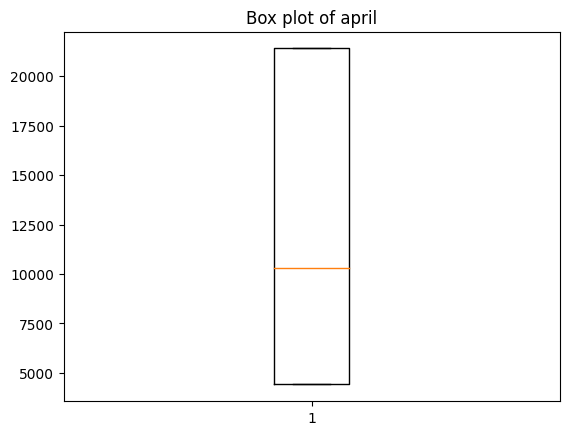

In [351]:
plt.boxplot(data_non_missing_num['cc_cons_apr'].dropna())
plt.title(f'Box plot of april')
plt.show()

In [352]:
data_non_missing_num.shape

(15000, 46)

# Handling missing values 

In [353]:
#Function to handle missing values base on its type numerical or categorical data
def impute_missing_values(data, method='mean'):
    if data.dtype in ['float64', 'int64']:
        if method == 'mean':
            fill_value = data.mean()
        elif method == 'median':
            fill_value = data.median()
        else:
            raise ValueError(f"Invalid method: {method}")
    else:
        fill_value = data.mode().iloc[0]
    
    return data.fillna(fill_value)

In [354]:
#for continuous variables
data_non_missing_num = data_non_missing_num.apply(impute_missing_values)
data_non_missing_num.isnull().sum()

ID                              0
age                             0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons                         0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_a

In [355]:
#for categorical variables
data_non_missing_obj = data_non_missing_obj.apply(impute_missing_values)
data_non_missing_obj

,account_type,gender,Income,loan_enq
111,current,M,MEDIUM,Y
112,current,M,HIGH,Y
113,current,M,MEDIUM,Y
114,current,F,MEDIUM,Y
115,current,M,MEDIUM,Y
...,...,...,...,...
15106,current,F,LOW,Y
15107,current,M,MEDIUM,Y
15108,current,M,MEDIUM,Y
15109,current,M,MEDIUM,Y


In [356]:
#verify if missing value contains in the dataset
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", data_non_missing_num.isnull().sum().values.sum())
print ("Missing values in categorical data :  ", data_non_missing_obj.isnull().sum().values.sum())


Missing values in numerical data :   0
Missing values in categorical data :   0


Create Dummy data for categorical data

In [357]:
def create_dummies(df, column):
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [358]:
# Convert categorical features to dummy variables
for feature in non_numeric_data_names:
    data_non_missing_obj[feature] = data_non_missing_obj[feature].astype('category')
    data_non_missing_obj = create_dummies(data_non_missing_obj, feature)

In [359]:
data_non_missing_obj

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
111,False,True,False,True
112,False,True,False,False
113,False,True,False,True
114,False,False,False,True
115,False,True,False,True
...,...,...,...,...
15106,False,False,True,False
15107,False,True,False,True
15108,False,True,False,True
15109,False,True,False,True


Merge Numerical and Non-numerical data (categorical data)

In [360]:
final_data = pd.concat([data_non_missing_num, data_non_missing_obj], axis=1)
final_data.head()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_apr,dc_cons_apr,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,ln_cc_cons,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
111,12554.00,35,15.0,3,708.0,0,16.0,20014.00,21405.00,1634.00,...,24920.08,4,65,50836.0,1674.09,9.904237,False,True,False,True
112,15015.25,35,15.0,6,424.0,0,14.0,10173.00,18941.62,1634.00,...,76206.00,21,63,23226.0,9376.39,9.227591,False,True,False,False
113,7604.00,53,18.0,3,799.0,1,6.0,16095.00,5678.87,2724.00,...,75283.00,7,12,27036.0,9376.39,9.686326,False,True,False,True
114,5060.50,33,5.1,6,799.0,1,6.0,7707.00,21405.00,1634.00,...,68708.00,21,73,43037.0,3544.33,8.950014,False,False,False,True
115,15015.25,34,12.6,4,799.0,1,7.0,20105.75,7441.40,6906.04,...,80140.00,8,32,32044.0,9376.39,9.908811,False,True,False,True


In [361]:
final_data.shape

(15000, 50)

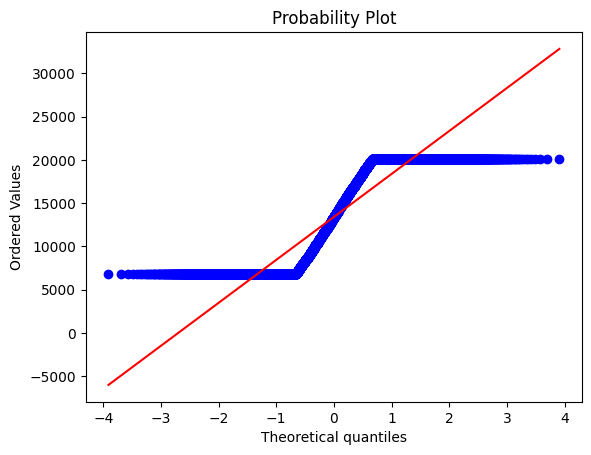

In [362]:
from scipy import stats
import pylab

stats.probplot(final_data.cc_cons, dist="norm", plot=pylab )
pylab.show()

Use boxcox technique to make the data perfectly normal distribution

In [363]:
from scipy import stats

# transform training data & save lambda value
final_data['bc_cc_cons'],fitted_lambda = stats.boxcox(final_data['cc_cons']+1)

In [364]:
final_data['bc_cc_cons'],fitted_lambda

(111      214.438691
 112      155.878056
 113      193.530301
 114      136.709033
 115      214.900667
             ...    
 15106    128.554757
 15107    161.869328
 15108    214.900667
 15109    214.900667
 15110    194.417180
 Name: bc_cc_cons, Length: 15000, dtype: float64,
 0.46587622082263763)

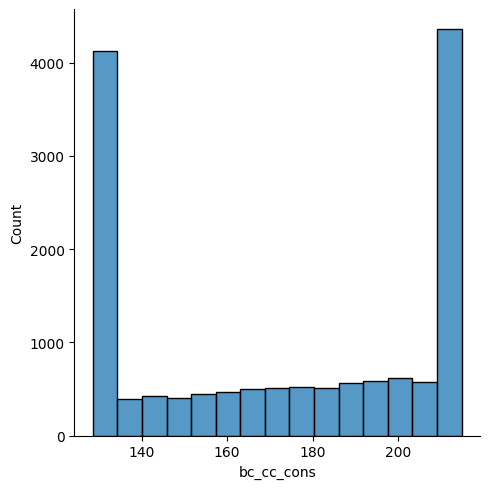

In [365]:
sns.displot(final_data.bc_cc_cons)

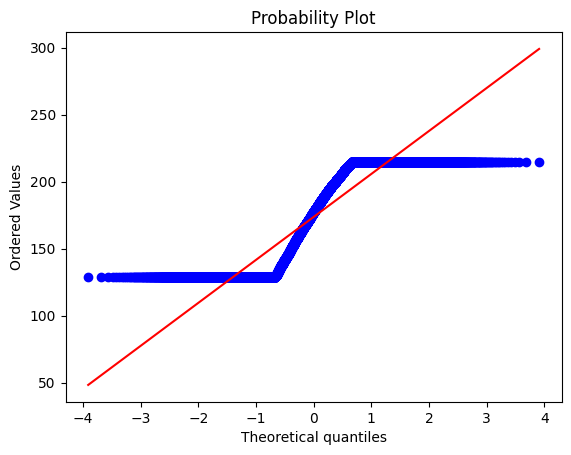

In [366]:
from scipy import stats
import pylab

stats.probplot(final_data.bc_cc_cons, dist="norm", plot=pylab )
pylab.show()

In [367]:
from scipy.stats import shapiro

stat, p = shapiro(final_data['bc_cc_cons'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=0.832, p=0.000
Data does not look Gaussian (reject H0)


/home/daro/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [368]:
final_data.drop('bc_cc_cons', axis=1, inplace=True)

In [369]:
final_data.drop('ln_cc_cons', axis=1, inplace=True)

In [370]:
final_data.columns

Index(['ID', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons',
       'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active',
       'account_type_saving', 'gender_M', 'Income_LOW', 'Income_MEDIUM'],
      dtype='object'

In [371]:
final_data.drop(['ID'], axis=1, inplace=True)

# Preparing train and test data

In [372]:
# Select feature columns
feature_columns=final_data.columns.difference(['cc_cons'])

In [373]:
feature_columns

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income_LOW',
       'Income_MEDIUM', 'NetBanking_Flag', 'Tenure_with_Bank',
       'account_type_saving', 'age', 'card_lim', 'cc_cons_apr', 'cc_cons_jun',
       'cc_cons_may', 'cc_count_apr', 'cc_count_jun', 'cc_count_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'credit_count_apr', 'credit_count_jun', 'credit_count_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr',
       'dc_count_jun', 'dc_count_may', 'debit_amount_apr', 'debit_amount_jun',
       'debit_amount_may', 'debit_count_apr', 'debit_count_jun',
       'debit_count_may', 'emi_active', 'gender_M', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may',
       'personal_loan_active', 'personal_loan_closed', 'region_code',
       'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [374]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(final_data[feature_columns],
                                              final_data['cc_cons'],
                                              test_size=0.2,
                                              random_state=12)
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

12000
3000
12000
3000


## Modelling

In [375]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':np.arange(5,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)

tree.fit(train_x,train_y) 

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])})

In [376]:
tree.best_params_ 

{'n_estimators': 24}

In [377]:
radm_clf = RandomForestRegressor(oob_score=False,n_estimators=12,max_depth=None)
radm_clf.fit( train_x, train_y)


RandomForestRegressor(n_estimators=12)

In [378]:
# Use the forest's predict method on the test data
pred_y = radm_clf.predict(test_x)
df1 = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_y})
df1

,Real Values,Predicted Values
2540,18533.00,11783.666667
13017,18658.00,12247.708333
5080,13719.00,14256.250000
6437,20105.75,10994.291667
1773,6768.00,13601.604167
...,...,...
9371,20105.75,11740.062500
8841,12837.00,12910.958333
10102,20105.75,12515.895833
5070,15572.00,13900.354167


In [379]:
errors = abs((pred_y - test_y)/test_y)
print('Mean Absolute Percentage Error:', round(np.mean(errors), 5)) 

Mean Absolute Percentage Error: 0.47147


In [380]:
rmspe = np.sqrt(np.mean(np.square(((test_y - pred_y) / test_y)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe*100)

Root Mean Squared Percentage Error (RMSPE):: 59.05932940364935


In [381]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_y, pred_y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_y, pred_y))
print('Explained Variance Score:', metrics.explained_variance_score(test_y, pred_y))
print('Max Error:', metrics.max_error(test_y, pred_y))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_y, pred_y))
print('Median Absolute Error:', metrics.median_absolute_error(test_y, pred_y))
print('R^2:', metrics.r2_score(test_y, pred_y))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_y, pred_y))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_y, pred_y))

Mean Absolute Error (MAE): 5041.1851875
Mean Squared Error (MSE): 31622082.1449851
Root Mean Squared Error (RMSE): 5623.351504662064
Mean Absolute Percentage Error (MAPE): 0.4714679011155496
Explained Variance Score: -0.07812289418262819
Max Error: 11433.625
Mean Squared Log Error: 0.21455234733857462
Median Absolute Error: 5349.9375
R^2: -0.0781334217211378
Mean Poisson Deviance: 2447.9849807821074
Mean Gamma Deviance: 0.19762489215052417


In [382]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.99 %.


In [383]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,max_credit_amount_apr,0.032466
1,2,credit_amount_may,0.031330
2,3,dc_cons_jun,0.031141
3,4,max_credit_amount_jun,0.031091
4,5,debit_amount_apr,0.030666
5,6,cc_cons_jun,0.030190
6,7,card_lim,0.030007
7,8,cc_cons_may,0.029376
8,9,cc_cons_apr,0.029248
9,10,emi_active,0.028476


# Predict cc_cons of missing values 

In [384]:
data_missing

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,0,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,47,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,2,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,3,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91


In [385]:
data_missing.drop(['cc_cons','ID'],axis=1, inplace= True)

/tmp/ipykernel_25871/1851808078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing.drop(['cc_cons','ID'],axis=1, inplace= True)


In [386]:
for x in ['account_type', 'gender', 'Income', 'loan_enq']:
    data_missing.loc[:, x] = data_missing[x].astype('object')

In [387]:
data_missing[x]

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
19995    Y
19996    Y
19997    Y
19998    Y
19999    Y
Name: loan_enq, Length: 5000, dtype: object

In [388]:
# Create a new DataFrame containing only the numeric columns
numeric_data_missing = data_missing.select_dtypes(include='number')

# Create a new DataFrame containing only the non-numeric columns
non_numeric_data_missing = data_missing.select_dtypes(exclude='number')

numeric_data_names = list(numeric_data.columns)
non_numeric_data_names = list(non_numeric_data.columns)

print(numeric_data_names)
print(non_numeric_data_names)


['ID', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'ln_cc_cons']
['account_type', 'gender', 'Income', 'loan_enq']


In [389]:
data_missing_num = numeric_data_missing
data_missing_num.head(5)

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,63,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,...,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72
1,36,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,...,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79
2,28,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,...,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85
3,32,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,...,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34
4,32,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,...,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39


In [390]:
data_missing_num = data_missing_num.apply(lambda x: x.clip(lower = x.quantile(0.25), upper = x.quantile(0.75)))

In [391]:
data_missing_non_num = non_numeric_data_missing
data_missing_non_num.head()

,account_type,gender,Income,loan_enq
0,current,M,MEDIUM,Y
1,current,M,MEDIUM,Y
2,current,F,MEDIUM,Y
3,current,M,MEDIUM,Y
4,current,M,HIGH,Y


In [392]:
data_non_missing_num.shape

(15000, 46)

In [393]:
# for categorical and continuous variables
data_missing_num = data_missing_num.apply(impute_missing_values)
data_missing_num

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,53.25,18.2,8,628.0,1,6.0,7998.480,2289.00,9553.000,2879.58,...,61887.50,5,14,20770.00,44884.90,87671.28,21,73,46088.00,2646.720
1,36.00,14.4,8,656.0,0,12.0,16479.640,1563.73,7386.490,6763.00,...,36644.25,4,63,57366.25,87488.20,87671.28,7,12,18587.25,5469.790
2,33.00,5.1,8,428.0,1,13.0,20660.260,9354.65,4170.530,8392.00,...,50121.00,6,69,20427.50,87488.20,35467.00,16,42,41121.00,7207.850
3,33.00,9.6,3,614.0,1,16.0,9662.310,5306.39,5261.000,8392.00,...,24917.00,2,69,23332.00,25876.80,87204.35,4,12,32003.00,1529.960
4,33.00,12.0,7,750.0,1,16.0,13239.860,7063.00,17853.875,8392.00,...,41381.00,3,69,41672.00,83525.75,83992.00,21,12,18587.25,2621.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,53.25,18.2,6,428.0,1,7.0,4611.000,9354.65,17853.875,1582.00,...,61078.00,2,11,24438.00,87488.20,31284.00,4,38,42872.00,6334.200
19996,53.00,18.2,5,799.0,0,14.0,9545.000,2061.00,4269.270,1582.00,...,37545.00,10,11,57366.25,25876.80,87671.28,21,12,36747.00,9369.155
19997,53.25,18.2,3,466.0,0,10.0,4290.135,9354.65,11019.000,4774.50,...,48230.00,2,69,34327.00,32198.63,46800.00,4,38,18810.00,1930.190
19998,33.00,6.0,8,619.0,0,16.0,11456.230,3999.00,3617.000,1582.00,...,94088.00,3,69,51929.00,27334.14,24914.56,21,73,18587.25,9369.155


In [394]:
data_missing_non_num = data_missing_non_num.apply(impute_missing_values)
data_missing_non_num

,account_type,gender,Income,loan_enq
0,current,M,MEDIUM,Y
1,current,M,MEDIUM,Y
2,current,F,MEDIUM,Y
3,current,M,MEDIUM,Y
4,current,M,HIGH,Y
...,...,...,...,...
19995,current,F,MEDIUM,Y
19996,current,M,MEDIUM,Y
19997,current,F,MEDIUM,Y
19998,current,M,LOW,Y


In [395]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", data_missing_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", data_missing_non_num.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


In [396]:
data_missing_non_num=data_missing_non_num.select_dtypes(include=['object'])
cat_varlist=list(data_missing_non_num.columns)

In [397]:
# Convert categorical features to dummy variables
for feature in non_numeric_data_names:
    data_missing_non_num[feature] = data_missing_non_num[feature].astype('category')
    data_missing_non_num = create_dummies(data_missing_non_num, feature)

In [398]:
data_missing_non_num.sample(5)

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
19071,False,True,True,False
15461,False,True,False,True
18219,False,False,True,False
18771,True,True,False,True
15657,False,True,False,True


In [399]:
final_missing_data = pd.concat([data_missing_num, data_missing_non_num], axis=1)
final_missing_data.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,53.25,18.2,8,628.0,1,6.0,7998.48,2289.00,9553.000,2879.58,...,44884.90,87671.28,21,73,46088.00,2646.72,False,True,False,True
1,36.00,14.4,8,656.0,0,12.0,16479.64,1563.73,7386.490,6763.00,...,87488.20,87671.28,7,12,18587.25,5469.79,False,True,False,True
2,33.00,5.1,8,428.0,1,13.0,20660.26,9354.65,4170.530,8392.00,...,87488.20,35467.00,16,42,41121.00,7207.85,False,False,False,True
3,33.00,9.6,3,614.0,1,16.0,9662.31,5306.39,5261.000,8392.00,...,25876.80,87204.35,4,12,32003.00,1529.96,False,True,False,True
4,33.00,12.0,7,750.0,1,16.0,13239.86,7063.00,17853.875,8392.00,...,83525.75,83992.00,21,12,18587.25,2621.39,False,True,False,False


In [400]:
radm_clf.estimators_[0].feature_importances_

array([0.02392338, 0.02621024, 0.00785923, 0.00364852, 0.00557296,
       0.02298805, 0.00403936, 0.02020087, 0.02634416, 0.02566989,
       0.03138654, 0.0172991 , 0.02211614, 0.02653876, 0.02624671,
       0.03280597, 0.03832791, 0.02987766, 0.01851055, 0.02096905,
       0.01680982, 0.02764785, 0.02774047, 0.02668197, 0.02114296,
       0.01770155, 0.02361003, 0.04395879, 0.02969967, 0.01820066,
       0.02110351, 0.02530756, 0.02081259, 0.02414915, 0.00367067,
       0.02814193, 0.02440237, 0.02671524, 0.02596665, 0.03805398,
       0.02841925, 0.02235677, 0.        , 0.        , 0.02717149,
       0.        , 0.        ])

In [401]:
# Use the forest's predict method on the test data
pred_y = radm_clf.predict(final_missing_data[feature_columns])
df1 = pd.DataFrame({'Predicted Values':pred_y})
df1

,Predicted Values
0,12566.770833
1,11143.791667
2,11037.562500
3,12009.875000
4,13708.541667
...,...
4995,13138.375000
4996,11282.437500
4997,10904.645833
4998,12912.041667
